# COVID-19 Positive Analysis

## Importing required libraries

matplotlib and seaborn libraries are used for plotting graphs

In [334]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import calendar
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Loading

Data from various sources will be loaded into individual dataframes before concatenating into one

In [335]:
"""Read training data from train.csv into the dataframe"""
df_paris  = pd.read_csv('paris-air-quality.csv')
df_paris['city'] = 'Paris'
df_wuhan  = pd.read_csv('wuhan-air-quality.csv')
df_wuhan['city'] = 'Wuhan'
df_seoul  = pd.read_csv('seoul-air-quality.csv')
df_seoul['city'] = 'Seoul'
df_ny  = pd.read_csv('new-york-air-quality.csv')
df_ny['city'] = 'NewYork'
df_delhi  = pd.read_csv('alipur,-delhi, delhi, india-air-quality.csv')
df_delhi['city'] = 'Delhi'
df_la = pd.read_csv('los-angeles-north main street-air-quality.csv')
df_la['city'] = 'LosAngeles'
df_hk = pd.read_csv('hong-kong-air-quality.csv')
df_hk['city'] = 'HongKong'
df_beijing = pd.read_csv('beijing-air-quality.csv')
df_beijing['city'] = 'Beijing'
df = pd.concat([df_paris,df_wuhan,df_seoul,df_ny,df_delhi,df_la,df_hk,df_beijing],sort=False)
df.head()

,date,pm25,pm10,o3,no2,so2,co,city
0,2020/4/2,65,25,31,23,,,Paris
1,2020/4/3,61,26,28,26,,,Paris
2,2020/4/4,53,26,37,22,,,Paris
3,2020/4/5,60,19,39,16,,,Paris
4,2020/4/6,50,22,32,14,,,Paris


In [336]:
df.shape

(16318, 8)

In [337]:
"""Remove whitespaces from the column names"""
df.columns = df.columns.str.strip()

In [338]:
"""Replace blanks with np.NAN and drops all NAs"""
df['pm25'].replace(' ', np.nan, inplace=True)
df = df[df['pm25'].notna()]

"""Convert the column pm25 as integer"""
df['pm25'] = df['pm25'].astype(int)
pm25=df[['date','pm25','city']]
#pm25.shape
pm25['city'].unique()

array(['Paris', 'Wuhan', 'Seoul', 'NewYork', 'Delhi', 'LosAngeles',
       'HongKong', 'Beijing'], dtype=object)

In [339]:
"""For CO"""
df['co'].replace(' ', np.nan, inplace=True)
df = df[df['co'].notna()]

"""Convert the column co as integer"""
df['co'] = df['co'].astype(int)
co=df[['date','co','city']]
#pm25.shape
co['city'].unique()

array(['Paris', 'Wuhan', 'Seoul', 'NewYork', 'Delhi', 'LosAngeles',
       'HongKong', 'Beijing'], dtype=object)

# Filter data starting from a date

In [340]:
start_date = '2018/01/01'
pm25['date']= pd.to_datetime(pm25['date'], format='%Y-%m-%d')
range= (pm25['date'] > start_date)
pm25_range=pm25.loc[range]
pm25_range.shape

(6384, 3)

In [341]:
pm25_range['year']= pm25_range['date'].map(lambda x : x.year)

# Plotting city wise based on different lockdown period

In [342]:
pm25_range.head()

,date,pm25,city,year
0,2020-04-02,65,Paris,2020
1,2020-04-03,61,Paris,2020
2,2020-04-04,53,Paris,2020
3,2020-04-05,60,Paris,2020
4,2020-04-06,50,Paris,2020


In [343]:
city_range= ((pm25_range['date'] >= '2018/02/26') & (pm25_range['date'] <= '2018/03/18')) | ((pm25_range['date'] >= '2019/02/26') & (pm25_range['date'] <= '2019/03/18')) | ((pm25_range['date'] >= '2020/02/26') & (pm25_range['date'] <= '2020/03/18'))
pm25_lockdown=pm25_range.loc[city_range]
pm25_lockdown['city'].unique()

array(['Paris', 'Wuhan', 'Seoul', 'NewYork', 'Delhi', 'LosAngeles',
       'HongKong', 'Beijing'], dtype=object)

In [344]:
pm25_lockdown['year']= pm25_lockdown['date'].map(lambda x : x.year)

In [345]:
pm25_lockdown.head()

,date,pm25,city,year
26,2020-03-02,41,Paris,2020
27,2020-03-03,43,Paris,2020
28,2020-03-04,53,Paris,2020
29,2020-03-05,45,Paris,2020
30,2020-03-06,39,Paris,2020


In [346]:
pm25_lockdown_grpby_yr = pm25_lockdown.groupby(['year','city'])['pm25'].mean().reset_index(name='Avg')
pm25_lockdown_grpby_yr.head()

,year,city,Avg
0,2018,Beijing,154.666667
1,2018,HongKong,85.952381
2,2018,LosAngeles,39.571429
3,2018,NewYork,31.523810
4,2018,Paris,66.809524


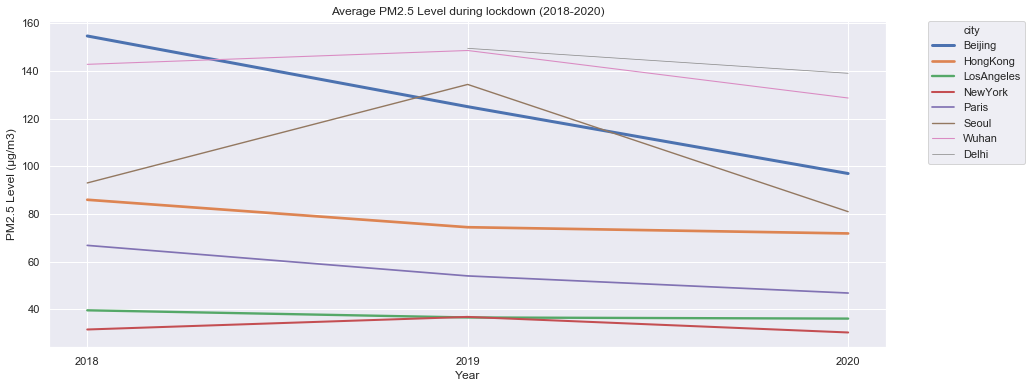

In [347]:
pm25_lockdown_citywise = pd.melt(pm25_lockdown_grpby_yr,id_vars=['city', 'year'], var_name='pollutant')
sns.set()
plt.figure(figsize=(15,6))
plt.title('Average PM2.5 Level during lockdown (2018-2020)')
sns.lineplot(x='year', 
             y='value',
             hue='city',
             size="city",
             data=pm25_lockdown_citywise)
plt.xlabel('Year')
plt.ylabel('PM2.5 Level (µg/m3)')
plt.xticks(np.arange(min(pm25_lockdown_citywise['year']), max(pm25_lockdown_citywise['year'])+1, 1.0))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Calculate average based on year and month 

In [348]:
pm25_range['month']= pm25_range['date'].map(lambda x : x.month)
pm25_range_city = pm25_range[pm25_range['city'] == 'Beijing']
pm25_grpby_yr_mnth = pm25_range_city.groupby(['month','year'])['pm25'].mean().reset_index(name='Avg')
pm25_grpby_yr_mnth = pm25_grpby_yr_mnth[pm25_grpby_yr_mnth['month'] < 5]
pm25_grpby_yr_mnth.head()

,month,year,Avg
0,1,2018,81.466667
1,1,2019,119.600000
2,1,2020,128.766667
3,2,2018,100.214286
4,2,2019,116.178571


# Average Bar Plot for each year for first four months

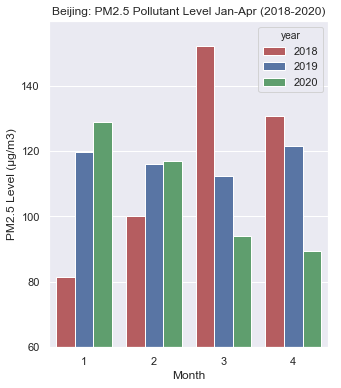

In [349]:
"""For Wuhan"""
pm25_mnth_yearwise = pd.melt(pm25_grpby_yr_mnth,id_vars=['month', 'year'], var_name='pollutant')
sns.set()
plt.figure(figsize=(5,6))
plt.title('Beijing: PM2.5 Pollutant Level Jan-Apr (2018-2020)')
sns.barplot(x='month', 
             y='value',
             hue='year',
             palette = ['r','b','g'],
             data=pm25_mnth_yearwise)
plt.xlabel('Month')
plt.ylabel('PM2.5 Level (µg/m3)')
plt.ylim(60)
plt.show()

# Average Bar Plot for year 2020

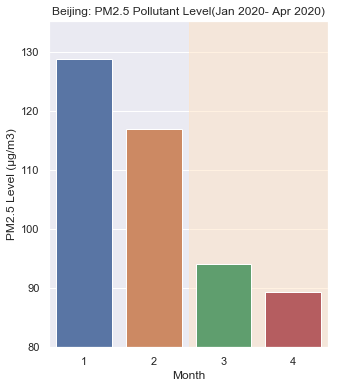

In [350]:
"""For Wuhan"""
pm25_2020_city = pm25_range[pm25_range['city'] == 'Beijing']
pm25_2020 = pm25_2020_city.groupby(['month','year'])['pm25'].mean().reset_index(name='Avg')
pm25_2020 = pm25_2020[pm25_2020['year']== 2020]
sns.set()
plt.figure(figsize=(5,6))
plt.title('Beijing: PM2.5 Pollutant Level(Jan 2020- Apr 2020)')
plt.axvspan(1.5,4, alpha=0.5, color='bisque', label='Lockdown period')
sns.barplot(x='month', 
             y='Avg',
             data=pm25_2020)
plt.xlabel('Month')
plt.ylabel('PM2.5 Level (µg/m3)')
plt.ylim(80)
plt.show()

# Year Data Plotting for selected month in df=pm25_range

In [351]:
"""For Wuhan"""
pm25_range_city=pm25_range[pm25_range['city'] == 'Delhi']
pm25_range_city['day']= pm25_range_city['date'].map(lambda x : x.day)
pm25_range_city = pm25_range_city[pm25_range_city['date'].dt.month.isin([4])]
pm25_range_city=pm25_range_city[['pm25','year','day']]
pm25_range_city.head()

,pm25,year,day
0,98,2020,2
1,77,2020,3
2,80,2020,4
3,107,2020,5
4,132,2020,6


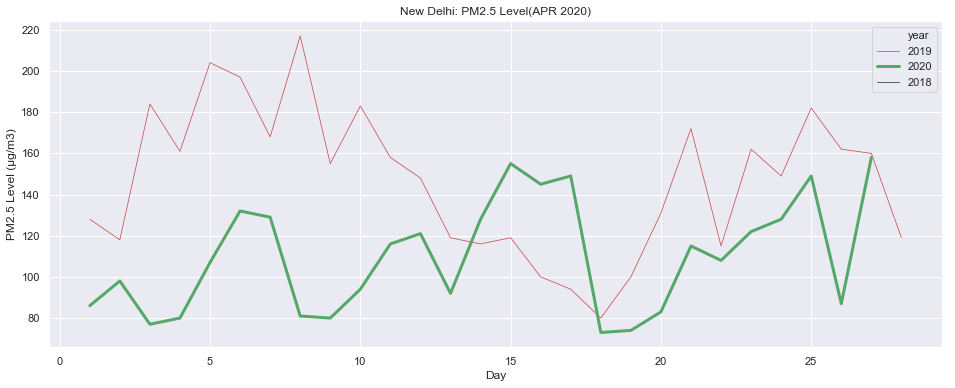

In [352]:
"""Wuhan"""
pm25_yearwise = pd.melt(pm25_range_city,id_vars=['day', 'year'], var_name='pollutant')
sns.set()
plt.figure(figsize=(16,6))
plt.title('New Delhi: PM2.5 Level(APR 2020)')
sns.lineplot(x='day', 
             y='value',
             hue='year',
             palette=['r','g'],
             size="year",
             data=pm25_yearwise)
plt.xlabel('Day')
plt.ylabel('PM2.5 Level (µg/m3)')
plt.show()

# Bar plotting of lockdown duration citywise

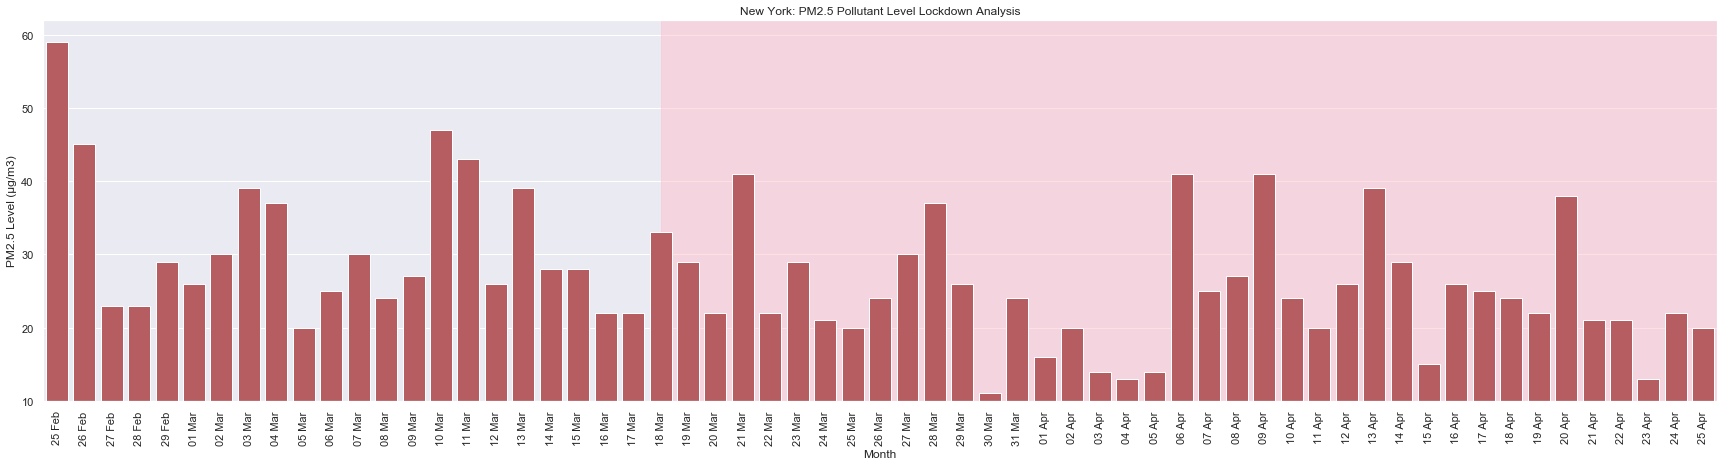

In [353]:
"""Significant difference visible in Delhi, LosAngeles, Beijing"""
crit = (pm25_range['year']== 2020) & (pm25_range['city'] == 'NewYork') & (pm25_range['date'] >= '2020/2/25') & (pm25_range['date'] <= '2020/4/25')
pm25_city_2020 = pm25_range.loc[crit]
pm25_city_2020.sort_values(by=['date'],inplace=True)
pm25_city_2020['date'] = pm25_city_2020['date'].map(lambda x: x.strftime('%d %b'))
plt.figure(figsize=(30,7))
plt.title('New York: PM2.5 Pollutant Level Lockdown Analysis')
plt.axvspan(22,200, alpha=0.5, color='pink', label='Lockdown period')
sns.barplot(x='date', 
             y='pm25',
            palette = ['r'],
             data=pm25_city_2020)
plt.xlabel('Month')
plt.ylabel('PM2.5 Level (µg/m3)')
plt.xticks(rotation = 90)
plt.ylim(10)
plt.show()

# Read AirTraffic Data

In [406]:
df_air = pd.read_excel('2020_AirTraffic.xlsx')
df_air.head()

,Countries,2020-01-06 00:00:00,2020-01-13 00:00:00,2020-01-20 00:00:00,2020-01-27 00:00:00,2020-02-03 00:00:00,2020-02-10 00:00:00,2020-02-17 00:00:00,2020-02-24 00:00:00,2020-03-02 00:00:00,2020-03-09 00:00:00,2020-03-16 00:00:00,2020-03-23 00:00:00,2020-03-30 00:00:00,2020-04-06 00:00:00,2020-04-13 00:00:00
0,ALL,814625,806924,806505,805881,775141,732120,728408,734927,756880,743169,720239,584116,437769,343431,299729
1,Spain,14763,13842,13830,13946,14260,14795,15486,15604,15673,15386,13647,4111,2124,1408,1100
2,Hong Kong,3306,3331,3467,3480,3025,2113,1590,1376,1096,836,719,687,440,289,220
3,Germany,15303,15249,15357,15528,15811,16178,16411,16657,16741,14907,12270,5004,2171,1424,1384
4,Singapore,3862,3871,3952,3967,3704,3360,3211,3035,2894,2510,2399,855,343,377,281


In [407]:
df_air=df_air[df_air['Countries'].isin(['USA','South Korea','India'])]
df_air = df_air.set_index('Countries')
df_air

,2020-01-06 00:00:00,2020-01-13 00:00:00,2020-01-20 00:00:00,2020-01-27 00:00:00,2020-02-03 00:00:00,2020-02-10 00:00:00,2020-02-17 00:00:00,2020-02-24 00:00:00,2020-03-02 00:00:00,2020-03-09 00:00:00,2020-03-16 00:00:00,2020-03-23 00:00:00,2020-03-30 00:00:00,2020-04-06 00:00:00,2020-04-13 00:00:00
Countries,,,,,,,,,,,,,,,
South Korea,8655,8643,8793,8663,8316,7708,7185,6998,5532,4014,3649,3700,3652,3451,3366
USA,221643,217001,219912,218473,220628,221782,227852,228230,230771,236489,237920,227433,183691,129861,98956
India,30881,30732,29996,30514,30283,30578,30796,30965,31071,30814,30082,27170,8589,7833,12682


In [408]:
df_air_transpose = df_air.T
df_air_transpose = df_air_transpose.reset_index()
df_air_transpose = df_air_transpose.rename(columns={'index':'Date'})
df_air_transpose.head()

Countries,Date,South Korea,USA,India
0,2020-01-06,8655,221643,30881
1,2020-01-13,8643,217001,30732
2,2020-01-20,8793,219912,29996
3,2020-01-27,8663,218473,30514
4,2020-02-03,8316,220628,30283


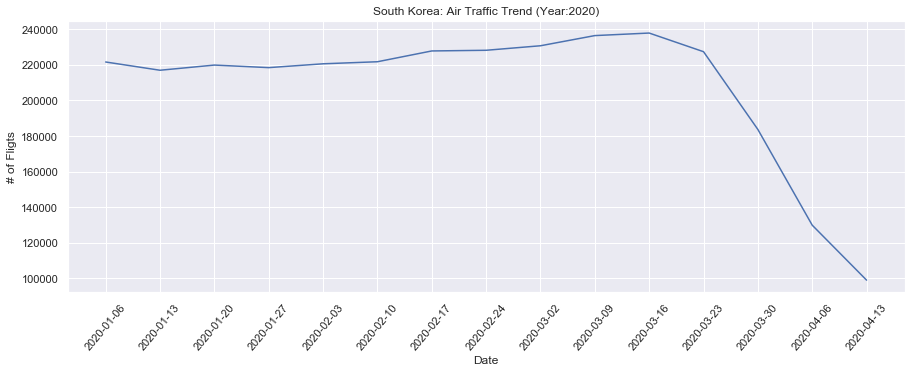

In [409]:
sns.set()
plt.figure(figsize=(15,5))
plt.title('South Korea: Air Traffic Trend (Year:2020)')
#plt.axvspan(14, 48, alpha=0.5, color='moccasin', label='Lockdown period')
sns.lineplot(x='Date', 
             y='USA',
             data=df_air_transpose)
plt.xlabel('Date')
plt.ylabel('# of Fligts')
plt.xticks(rotation=50)
plt.xticks(['2020-01-06','2020-01-13', '2020-01-20', '2020-01-27', '2020-02-03', '2020-02-10', '2020-02-17', '2020-02-24',  '2020-03-02', '2020-03-09', '2020-03-16', '2020-03-23', '2020-03-30', '2020-04-06', '2020-04-13'])
#plt.ylim(50)
plt.show()

# Read City Traffic Data

In [410]:
df_traffic = pd.read_csv('Citymapper_Mobility_Index_20200420.csv',skiprows=3)
df_traffic.columns

Index(['Date', 'Amsterdam', 'Barcelona', 'Berlin', 'Birmingham', 'Boston',
       'Brussels', 'Chicago', 'Copenhagen', 'Hamburg', 'Hong Kong', 'Istanbul',
       'Lisbon', 'London', 'Los Angeles', 'Lyon', 'Madrid', 'Manchester',
       'Melbourne', 'Mexico City', 'Milan', 'Monaco', 'Montréal', 'Moscow',
       'New York City', 'Paris', 'Philadelphia', 'Rhine-Ruhr', 'Rome',
       'San Francisco', 'Seattle', 'Seoul', 'Singapore', 'St. Petersburg',
       'Stockholm', 'Sydney', 'São Paulo', 'Tokyo', 'Toronto', 'Vancouver',
       'Vienna', 'Washington DC'],
      dtype='object')

In [413]:
df_traffic_city = df_traffic[['Date', 'New York City']]
df_traffic_city.shape


(91, 2)

In [414]:
df_traffic_city = df_traffic_city.dropna()
df_traffic_city.shape

(49, 2)

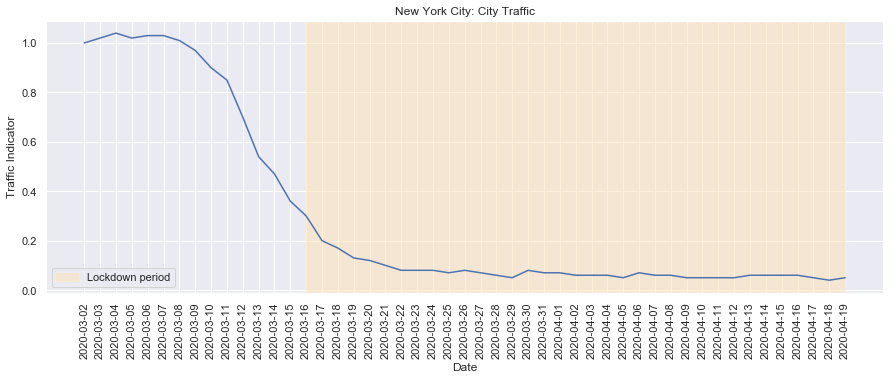

In [415]:
sns.set()
plt.figure(figsize=(15,5))
plt.title('New York City: City Traffic')
plt.axvspan(14, 48, alpha=0.5, color='moccasin', label='Lockdown period')
sns.lineplot(x='Date', 
             y='New York City',
             data=df_traffic_city)
plt.xlabel('Date')
plt.ylabel('Traffic Indicator')
plt.xticks(rotation=90)
#plt.ylim(50)
plt.show()

# Read Industry Data

In [416]:
df_industry=pd.read_csv('USA_IndustrialTrend.csv')
df_industry.head()

,Descriptions:,Unit:,Multiplier:,Currency:,Unique Identifier:,Series Name:,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03
0,Total index; s.a. IP,Index:_2012_100,1.0,NaN,G17/IP_MAJOR_INDUSTRY_GROUPS/IP.B50001.S,IP.B50001.S,109.4725,109.0270,110.0525,109.6151,109.0830,109.5819,103.6635
1,Total index; n.s.a. IP,Index:_2012_100,1.0,NaN,G17/IP_MAJOR_INDUSTRY_GROUPS/IP.B50001.N,IP.B50001.N,110.1146,108.8239,109.2372,109.1492,108.4974,109.4227,103.7426
2,Manufacturing (SIC); s.a. IP,Index:_2012_100,1.0,NaN,G17/IP_MAJOR_INDUSTRY_GROUPS/IP.B00004.S,IP.B00004.S,104.5218,103.9383,104.9005,105.0753,104.9486,104.8858,98.3291
3,Manufacturing (SIC); n.s.a. IP,Index:_2012_100,1.0,NaN,G17/IP_MAJOR_INDUSTRY_GROUPS/IP.B00004.N,IP.B00004.N,105.6515,105.1873,104.5939,103.3014,102.3079,104.0135,98.5511
4,Manufacturing (NAICS); s.a. IP,Index:_2012_100,1.0,NaN,G17/IP_MAJOR_INDUSTRY_GROUPS/IP.GMF.S,IP.GMF.S,105.6556,105.0590,106.1182,106.3364,106.1314,106.1112,99.4566


In [417]:
filter=(df_industry['Descriptions:'] =='Total index; s.a. IP') &(df_industry['Unique Identifier:'] =='G17/IP_MARKET_GROUPS/IP.B50001.S')
df_industry_usa=df_industry.loc[filter]
df_industry_usa= df_industry_usa[['2019-09','2019-10','2019-11','2019-12','2020-01','2020-02','2020-03']]
df_industry_usa.head()


,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03
512,109.4725,109.027,110.0525,109.6151,109.083,109.5819,103.6635


In [418]:
df_industry_usa_t = df_industry_usa.T
df_industry_usa_t = df_industry_usa_t.reset_index()
df_industry_usa_t = df_industry_usa_t.rename(columns={'index':'Date',512:'Value'})
df_industry_usa_t

,Date,Value
0,2019-09,109.4725
1,2019-10,109.0270
2,2019-11,110.0525
3,2019-12,109.6151
4,2020-01,109.0830
5,2020-02,109.5819
6,2020-03,103.6635


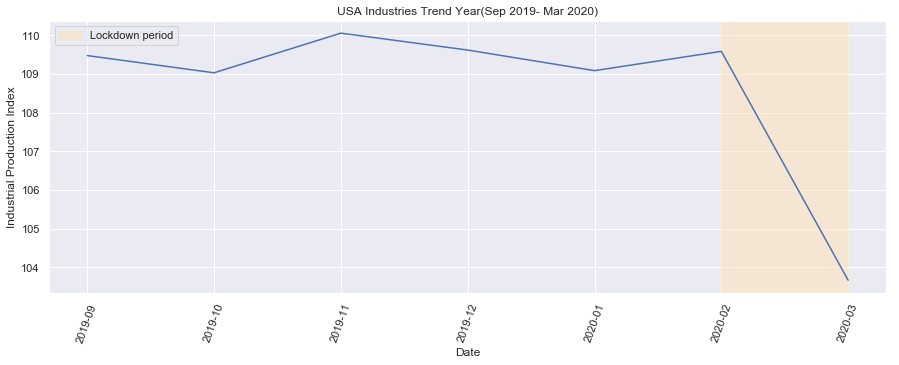

In [419]:
sns.set()
plt.figure(figsize=(15,5))
plt.title('USA Industries Trend Year(Sep 2019- Mar 2020)')
plt.axvspan(5, 6, alpha=0.5, color='moccasin', label='Lockdown period')
sns.lineplot(x='Date', 
             y='Value',
             data=df_industry_usa_t)
plt.xlabel('Date')
plt.ylabel('Industrial Production Index')
plt.xticks(rotation=70)
#plt.ylim(50)
plt.show()

# Pollutant with comparitive measures visualization

In [420]:
pm25_range['city'].unique()

array(['Paris', 'Wuhan', 'Seoul', 'NewYork', 'Delhi', 'LosAngeles',
       'HongKong', 'Beijing'], dtype=object)

In [421]:
cond = (pm25_range['city'] == 'NewYork') & (pm25_range['date'] >= '2020/2/3') & (pm25_range['date'] <= '2020/4/19')
pm25_city = pm25_range.loc[cond]
pm25_city['Type'] = 'pm25'
pm25_city['pm25'] = pm25_city['pm25']/100
pm25_city = pm25_city.rename(columns={'pm25':'Value', 'date':'Date'})
pm25_city = pm25_city[['Date','Value','Type']]
pm25_city.head()

,Date,Value,Type
0,2020-04-02,0.20,pm25
1,2020-04-03,0.14,pm25
2,2020-04-04,0.13,pm25
3,2020-04-05,0.14,pm25
4,2020-04-06,0.41,pm25


In [422]:
"""Converting to year and month"""
pm25_city['Date'] = pm25_city['Date'].map(lambda x : x.strftime('%Y-%m'))
pm25_city_grpby = pm25_city.groupby(['Date', 'Type'])['Value'].mean().reset_index(name='Value')
pm25_city_grpby.head()

,Date,Type,Value
0,2020-02,pm25,0.408148
1,2020-03,pm25,0.284516
2,2020-04,pm25,0.242632


In [423]:
df_traffic_city['Type'] = 'CityTraffic'
df_traffic_city = df_traffic_city.rename(columns={'New York City':'Value'})
df_traffic_city.head()

,Date,Value,Type
42,2020-03-02,1.00,CityTraffic
43,2020-03-03,1.02,CityTraffic
44,2020-03-04,1.04,CityTraffic
45,2020-03-05,1.02,CityTraffic
46,2020-03-06,1.03,CityTraffic


In [424]:
"""Converting to year and month"""
df_traffic_city['Date'] = pd.to_datetime(df_traffic_city['Date'])
df_traffic_city['Date'] = df_traffic_city['Date'].map(lambda x : x.strftime('%Y-%m'))
df_traffic_city_grpby = df_traffic_city.groupby(['Date', 'Type'])['Value'].mean().reset_index(name='Value')
df_traffic_city_grpby.head()

,Date,Type,Value
0,2020-03,CityTraffic,0.456000
1,2020-04,CityTraffic,0.056316


In [425]:
df_industry_usa_t['Type'] = 'Industry'
df_industry_usa_t['Value'] = df_industry_usa_t['Value']/100
df_industry_usa_t['Date'] = pd.to_datetime(df_industry_usa_t['Date'])
df_industry_usa_t = df_industry_usa_t[df_industry_usa_t['Date'].dt.strftime('%Y-%m') >= '2020-02']
df_industry_usa_t['Date'] = df_industry_usa_t['Date'].map(lambda x : x.strftime('%Y-%m'))
df_industry_usa_t.head()

,Date,Value,Type
5,2020-02,1.095819,Industry
6,2020-03,1.036635,Industry


In [426]:
df_air_transpose_country=df_air_transpose[['Date','USA']]
df_air_transpose_country['Type'] = 'AirTraffic'
df_air_transpose_country = df_air_transpose_country.rename(columns={'USA':'Value'})
df_air_transpose_country['Value'] = df_air_transpose_country['Value']/200000
df_air_transpose_country.head()

Countries,Date,Value,Type
0,2020-01-06,1.108215,AirTraffic
1,2020-01-13,1.085005,AirTraffic
2,2020-01-20,1.099560,AirTraffic
3,2020-01-27,1.092365,AirTraffic
4,2020-02-03,1.103140,AirTraffic


In [427]:
"""Converting to year and month"""
df_air_transpose_country['Date'] = pd.to_datetime(df_air_transpose_country['Date'])
df_air_transpose_country = df_air_transpose_country[df_air_transpose_country['Date'].dt.strftime('%Y-%m') >= '2020-02']
df_air_transpose_country['Date'] = df_air_transpose_country['Date'].map(lambda x : x.strftime('%Y-%m'))
df_air_transpose_country_grpby = df_air_transpose_country.groupby(['Date', 'Type'])['Value'].mean().reset_index(name='Value')
df_air_transpose_country_grpby.head()

,Date,Type,Value
0,2020-02,AirTraffic,1.123115
1,2020-03,AirTraffic,1.116304
2,2020-04,AirTraffic,0.572043


In [428]:
df_pm25_traffic = pd.concat([pm25_city_grpby, df_traffic_city_grpby, df_industry_usa_t, df_air_transpose_country_grpby])
df_pm25_traffic.head()

,Date,Type,Value
0,2020-02,pm25,0.408148
1,2020-03,pm25,0.284516
2,2020-04,pm25,0.242632
0,2020-03,CityTraffic,0.456000
1,2020-04,CityTraffic,0.056316


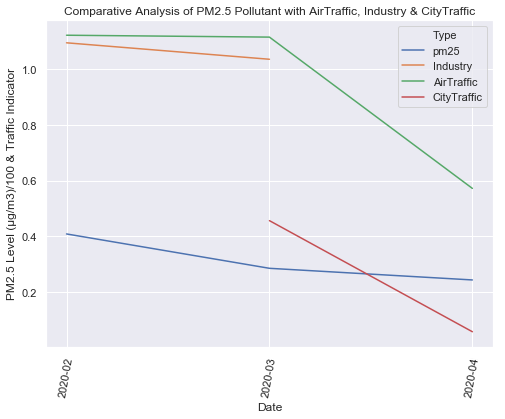

In [430]:
df_pm25_traffic_melt = pd.melt(df_pm25_traffic,id_vars=['Date', 'Type'], var_name='Value')
df_pm25_traffic_melt.sort_values(by=['Date'],inplace=True)
fig = plt.figure(figsize=(8,6))

plt.title('Comparative Analysis of PM2.5 Pollutant with AirTraffic, Industry & CityTraffic')
sns.lineplot(x='Date', 
             y='value',
             hue='Type',
             data=df_pm25_traffic_melt)
plt.xlabel('Date')
plt.ylabel('PM2.5 Level (µg/m3)/100 & Traffic Indicator')
plt.xticks(rotation=80)

plt.show()

# Shaded line plotting of lockdown period of each city

In [432]:
crit = (pm25_range['city'] == 'NewYork') 
pm25_city_2020 = pm25_range.loc[crit]
pm25_city_2020.set_index('date', inplace=True)
pm25_city_2020.sort_index()
pm25_city_2020['year'] = pm25_city_2020['year'].astype(int)
pm25_city_2020 = pm25_city_2020[['year','pm25']]
pm25_city_2020.head()


,year,pm25
date,,
2020-04-02,2020,20
2020-04-03,2020,14
2020-04-04,2020,13
2020-04-05,2020,14
2020-04-06,2020,41


Mean PM 2.5 concentration in year 2018 is 34.138888888888886
Mean PM 2.5 concentration in year 2019 is 31.166666666666668
Mean PM 2.5 concentration in year 2020 is 24.485714285714284


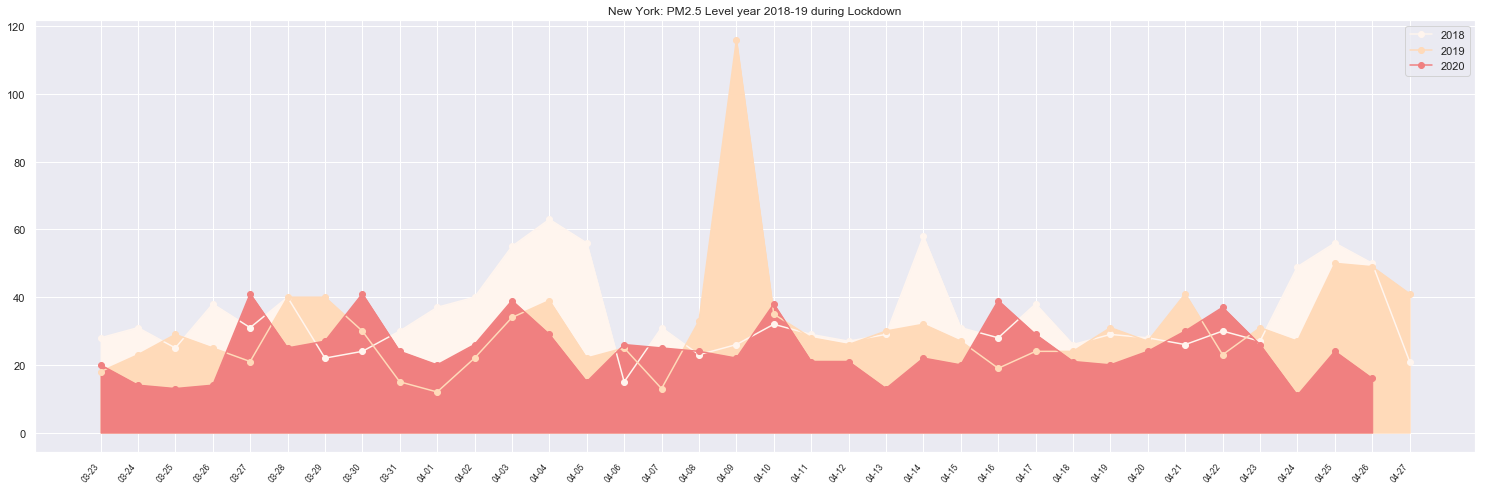

In [435]:
def compare(years,start_date,end_date,data):
    fig = plt.figure(figsize=(20,6))
    fig.autofmt_xdate()
    ax = fig.add_axes([0,0,1,1])
    plt.setp(ax.get_xticklabels(), rotation=50, horizontalalignment='right', fontsize='x-small')
    plt.title('New York: PM2.5 Level year 2018-19 during Lockdown')
    data_arr = []
    colors = ['seashell','peachpuff','lightcoral']
    i = 0
    for year in years:
        temp_data = data.loc[f'{year}-{start_date}':f'{year}-{end_date}']
        print(f'Mean PM 2.5 concentration in year {year} is',temp_data['pm25'].mean())
        temp_data.index = temp_data.index.strftime('%m-%d')
        data_list = temp_data.index.tolist()
        data_list.sort(key=lambda date: datetime.strptime(date, "%m-%d"))
        data_arr.append(temp_data)
        ax.plot(data_list, temp_data['pm25'], marker='o', linestyle='-', label=f'{year}', color=colors[i])
        ax.fill_between(data_list, temp_data['pm25'], interpolate=False,  color=colors[i])
        i = i+1
    ax.legend()
compare(['2018','2019','2020'],'03-23','04-27',pm25_city_2020)